In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cross_validation as CV
from sklearn.feature_extraction import DictVectorizer as DV
from datetime import date
from sklearn import linear_model as LM

%matplotlib inline

## Define score function

In [2]:
def myScore(y, y_pred):
    yLog = np.log(y);
    ind = np.isinf(yLog);
    yLog[ind == True] = 0;    
    
    y_predLog = np.log(y_pred);
    ind = np.isinf(y_predLog);
    y_predLog[ind == True] = 0;
    
    summ = np.sum(np.power(yLog-y_predLog,2))     
    return np.sqrt(summ/y.shape[0]);

# replace qualitative estimation to number
def replaceQualVal(dataSet,fNameList):
    # dictionary of values
    vocab = {
        'Ex': 5, 'EX': 5, # excellent    
        'Gd': 4, 'GD': 4, # good
        'TA': 3, 'Ta': 3, # normal
        'FA': 2, 'Fa': 2, # fair
        'PO': 1, 'Po': 1  # 
        }
    
    for fName in fNameList:
        
        # replace stings to numbers
        for word in vocab:
            searchDict = {fName:[word]};
            X = dataSet.isin(searchDict);
            dataSet.loc[X[fName],fName] = vocab[word];
        
        # convert to numeric type
        dataSet[[fName]] = dataSet[[fName]].apply(pd.to_numeric);
    return dataSet;    
# end of function    

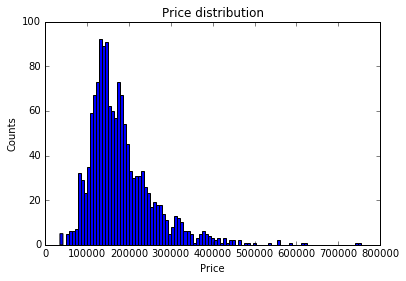

In [3]:
data = pd.read_csv('train.csv',index_col='Id')
features = data.drop('SalePrice',axis = 1)
price = data.SalePrice
plt.hist(price,bins = 100)
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price distribution')
plt.show()

## Create folds and trees 

In [4]:
folds = CV.KFold(price.size, n_folds=5, random_state = 43);
shuffle = CV.ShuffleSplit(price.size, n_iter=3, test_size=0.33, random_state=43)

In [5]:
-

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\frame.py:2756: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dow

In [6]:
Sz = transFeatures.shape
print Sz

(1460L, 264L)


## Create neural network

In [7]:
from pybrain.datasets            import SupervisedDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer
from pybrain.structure           import LinearLayer, SigmoidLayer, FeedForwardNetwork, FullConnection

from pylab                       import ion, ioff, figure, draw, contourf, clf, show, hold, plot
from scipy                       import diag, arange, meshgrid, where
from numpy.random                import multivariate_normal

## Create and fill up the dataset

In [8]:
alldata = SupervisedDataSet(Sz[1], 1)

for n in xrange(Sz[0]):
    fts = transFeatures[n,:];
    alldata.addSample(fts, price.values[n]);

alldata.saveToFile('NNdataset.dat')    

## Create a neural network

In [9]:
tstdata, trndata = alldata.splitWithProportion( 0.25 )
print "Number of training patterns: ", len(trndata)
print "Input and output dimensions: ", trndata.indim, trndata.outdim

Number of training patterns:  1095
Input and output dimensions:  264 1


In [10]:
n = FeedForwardNetwork();
inLayer = LinearLayer(Sz[1])
hiddenLayer = SigmoidLayer(Sz[1])
outLayer = LinearLayer(1)

n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)

in_to_hidden = FullConnection(inLayer, hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer, outLayer)

n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)

n.sortModules()
print n

FeedForwardNetwork-6
   Modules:
    [<LinearLayer 'LinearLayer-3'>, <SigmoidLayer 'SigmoidLayer-7'>, <LinearLayer 'LinearLayer-8'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'SigmoidLayer-7' -> 'LinearLayer-8'>, <FullConnection 'FullConnection-5': 'LinearLayer-3' -> 'SigmoidLayer-7'>]



In [ ]:
trainer = BackpropTrainer(n, dataset=trndata, momentum=0.1, verbose=True, weightdecay=0.01)
n_res = trainer.trainUntilConvergence(verbose = 1,maxEpochs=1000);

x = n.activateOnDataset(tstdata);
plt.plot(x)

Total error:  8504383374.89
Total error:  8088253127.68
Total error:  8122014065.6
Total error:  8145623927.58
Total error:  7559157951.97
Total error:  8134680825.76
Total error:  7903753933.12
Total error:  7824313102.18
Total error:  8685664490.08
Total error:  8210315038.48
Total error:  7982017706.44
Total error:  7972229803.96
Total error:  8691832122.79
Total error:  8518308685.53
Total error:  8778394988.11
Total error:  8339887813.28
Total error:  8751609905.38
Total error:  8245399752.19
Total error:  8775707000.07
Total error:  7767185495.27
Total error:  7872850996.55
Total error:  7894261913.73
Total error:  8233336592.42
Total error:  7948371167.94
Total error:  8356479789.36
Total error:  7902181806.09
Total error:  8032161676.58
Total error:  7838732304.24
Total error:  8224668975.17
Total error:  8196560750.95
Total error:  7964924216.2
Total error:  7865735204.82
Total error:  7771522577.5
Total error:  7904882888.98
Total error:  7793020547.65
Total error:  796893992